<img 
    style="position: absolute; 
           left: 60%; 
           top: 0; /* Added to ensure proper positioning */
           height: 900px; 
           width: 40%; /* Maintain the original width */
           object-fit: cover; /* Adjust if necessary */
           clip-path: inset(0px 50px 0px 50px round 10px);" 
    src= "public_html\_data\fig\buildingdamage.svg"
/>
</figure>


<h1 style="width: 60%; color: #EC6842; font-size: 55pt;">
    <Strong>
        IJsselsteinseweg 77 <br>FEA Study
    </Strong>
</h1>

<h2 id="Background"><B>
    Rationale for the project<a class="anchor-link" href="#Background">&#182;</a>
    </B>
</h2>
<p style="text-align: justify; width: 60%; font-weight: normal;">
     This studies case study is the building IJsselsteinseweg 77 in Nieuwegein in the Netherlands, a deatched 2-layer unreinforced masonry structure from 1961 with 2 floors and a cellar which was eventually demolished circa 2015. We can evaluate the state of damage before its demolishing due to a Foundation research report that was commissioned by the owner to Sandra Lobbe Ispectie & Advies, a building consulting firm who carried out the building and foundation investigation on June 2019 and thereafter produced a report documenting the buildings measurements, characteristics, damage state and their own assessment on the necessary course of action or risk of the building integrity due to subsidence effects. The main assessment found that the current capacity provided by the building’s foundation was Insufficient and given the experienced deformations by the building and the damage state of the building, countermeasures should be implemented in a period of 1-5 years following the assessment date. 
</p>

## <strong> X | Imports</strong>

In [1]:
from bricks.fea.convergence import analyse_models

import numpy as np
import matplotlib.pyplot as plt

## <strong> 1 | Structure dimensions and measurements</strong>

In [2]:
walls = {
    'Wall 1':{"x": np.array([0, 0, 0]), "y": np.array([0, 3.5, 7]), "z": np.array([0, -72, -152]), 'phi': np.array([1/200,1/200]), 'height': 5250, 'thickness': 27,'area': 390600},
    'Wall 2':{"x": np.array([0, 4.5, 8.9]), "y": np.array([7, 7, 7]), "z": np.array([-152, -163, -188]),  'phi': np.array([1/33,1/50]), 'height': 5250, 'thickness': 27,'area': 464625},
    'Wall 3':{"x": np.array([8.9, 8.9]), "y": np.array([3.6, 7]), "z": np.array([-149, -188]), 'phi': np.array([0,0]), 'height': 5250, 'thickness': 27,'area': 166950},
    'Wall 4':{"x": np.array([8.9, 10.8]), "y": np.array([3.6, 3.6]), "z": np.array([-149,-138]), 'phi': np.array([0,0]), 'height': 2850, 'thickness': 27,'area': 49020},
    'Wall 5':{"x": np.array([10.8, 10.8]), "y": np.array([0, 3.6]), "z": np.array([-104, -138]), 'phi': np.array([1/77,1/67]), 'height': 2850, 'thickness': 27,'area': 96720},
    'Wall 6':{"x": np.array([0, 5.2, 6.4, 8.9, 10.8]), "y": np.array([0, 0, 0, 0, 0]), "z": np.array([0, -42, -55, -75, -104]), 'phi': np.array([1/100,1/100]), 'height': 5000, 'thickness': 27, 'area': 517980},
}

## <strong> 2 | Subsidence aplication method study</strong>

In [11]:
def process(coords, abs_disp, max_rate, rate_multiple):
    coords = coords - min(coords)
    rel_disp = np.insert(np.diff(abs_disp),0,0)

    rel_iter = find_iter(rel_disp, max_rate, rate_multiple)
    abs_iter = find_iter(abs_disp, max_rate, rate_multiple)
    print(rel_iter, abs_iter)
    dydt_abs = abs_disp//abs_iter
    dydt_rel = rel_disp//rel_iter

    dydx_abs = np.gradient(dydt_abs,coords)
    dydx_rel = np.gradient(dydt_rel,coords)
    
    return dydx_abs/dydx_rel

def find_iter(abs_disp, max_rate, rate_multiple = False):
    """
    Calculates the number of iterations based on the absolute displacement, maximum rate, and rate multiple.

    Parameters:
    abs_disp (list): A list of absolute displacements.
    max_rate (float): The maximum rate.
    rate_multiple (float): The rate multiple.

    Returns:
    int: The number of iterations.

    """
    iter = max(abs(abs_disp)) // max_rate
    if rate_multiple:
        iter = iter + rate_multiple - iter % rate_multiple
    return iter

In [12]:
x = walls['Wall 2']['x']
z = walls['Wall 2']['z']
dz = z - z[0]

iter = find_iter(dz,max_rate=0.05)
iter

719.0

## <strong> 3 | Process runs</strong>

### <strong> 3.1 | Convergence runs</strong>

In [8]:
# dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models'
# analyse_models(dir)

path = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\2D\Standard\2\Outer\Wall2_outer_NLA.tb'
lines = read_file(path)

### <strong> 3.2 | Individual plots</strong>

In [ ]:
from bricks.fea.analysis import read_file,process_tabulated_analysis


path = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\2D\Standard\2\Outer\Wall2_outer_NLA.tb'
l1,l2 = process_tabulated_analysis(path)

C:\Users\javie\AppData\Local\Temp\ipykernel_16004\2248790628.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['load factor'][1:] = np.arange(1,len(df['load factor'][1:])+1)


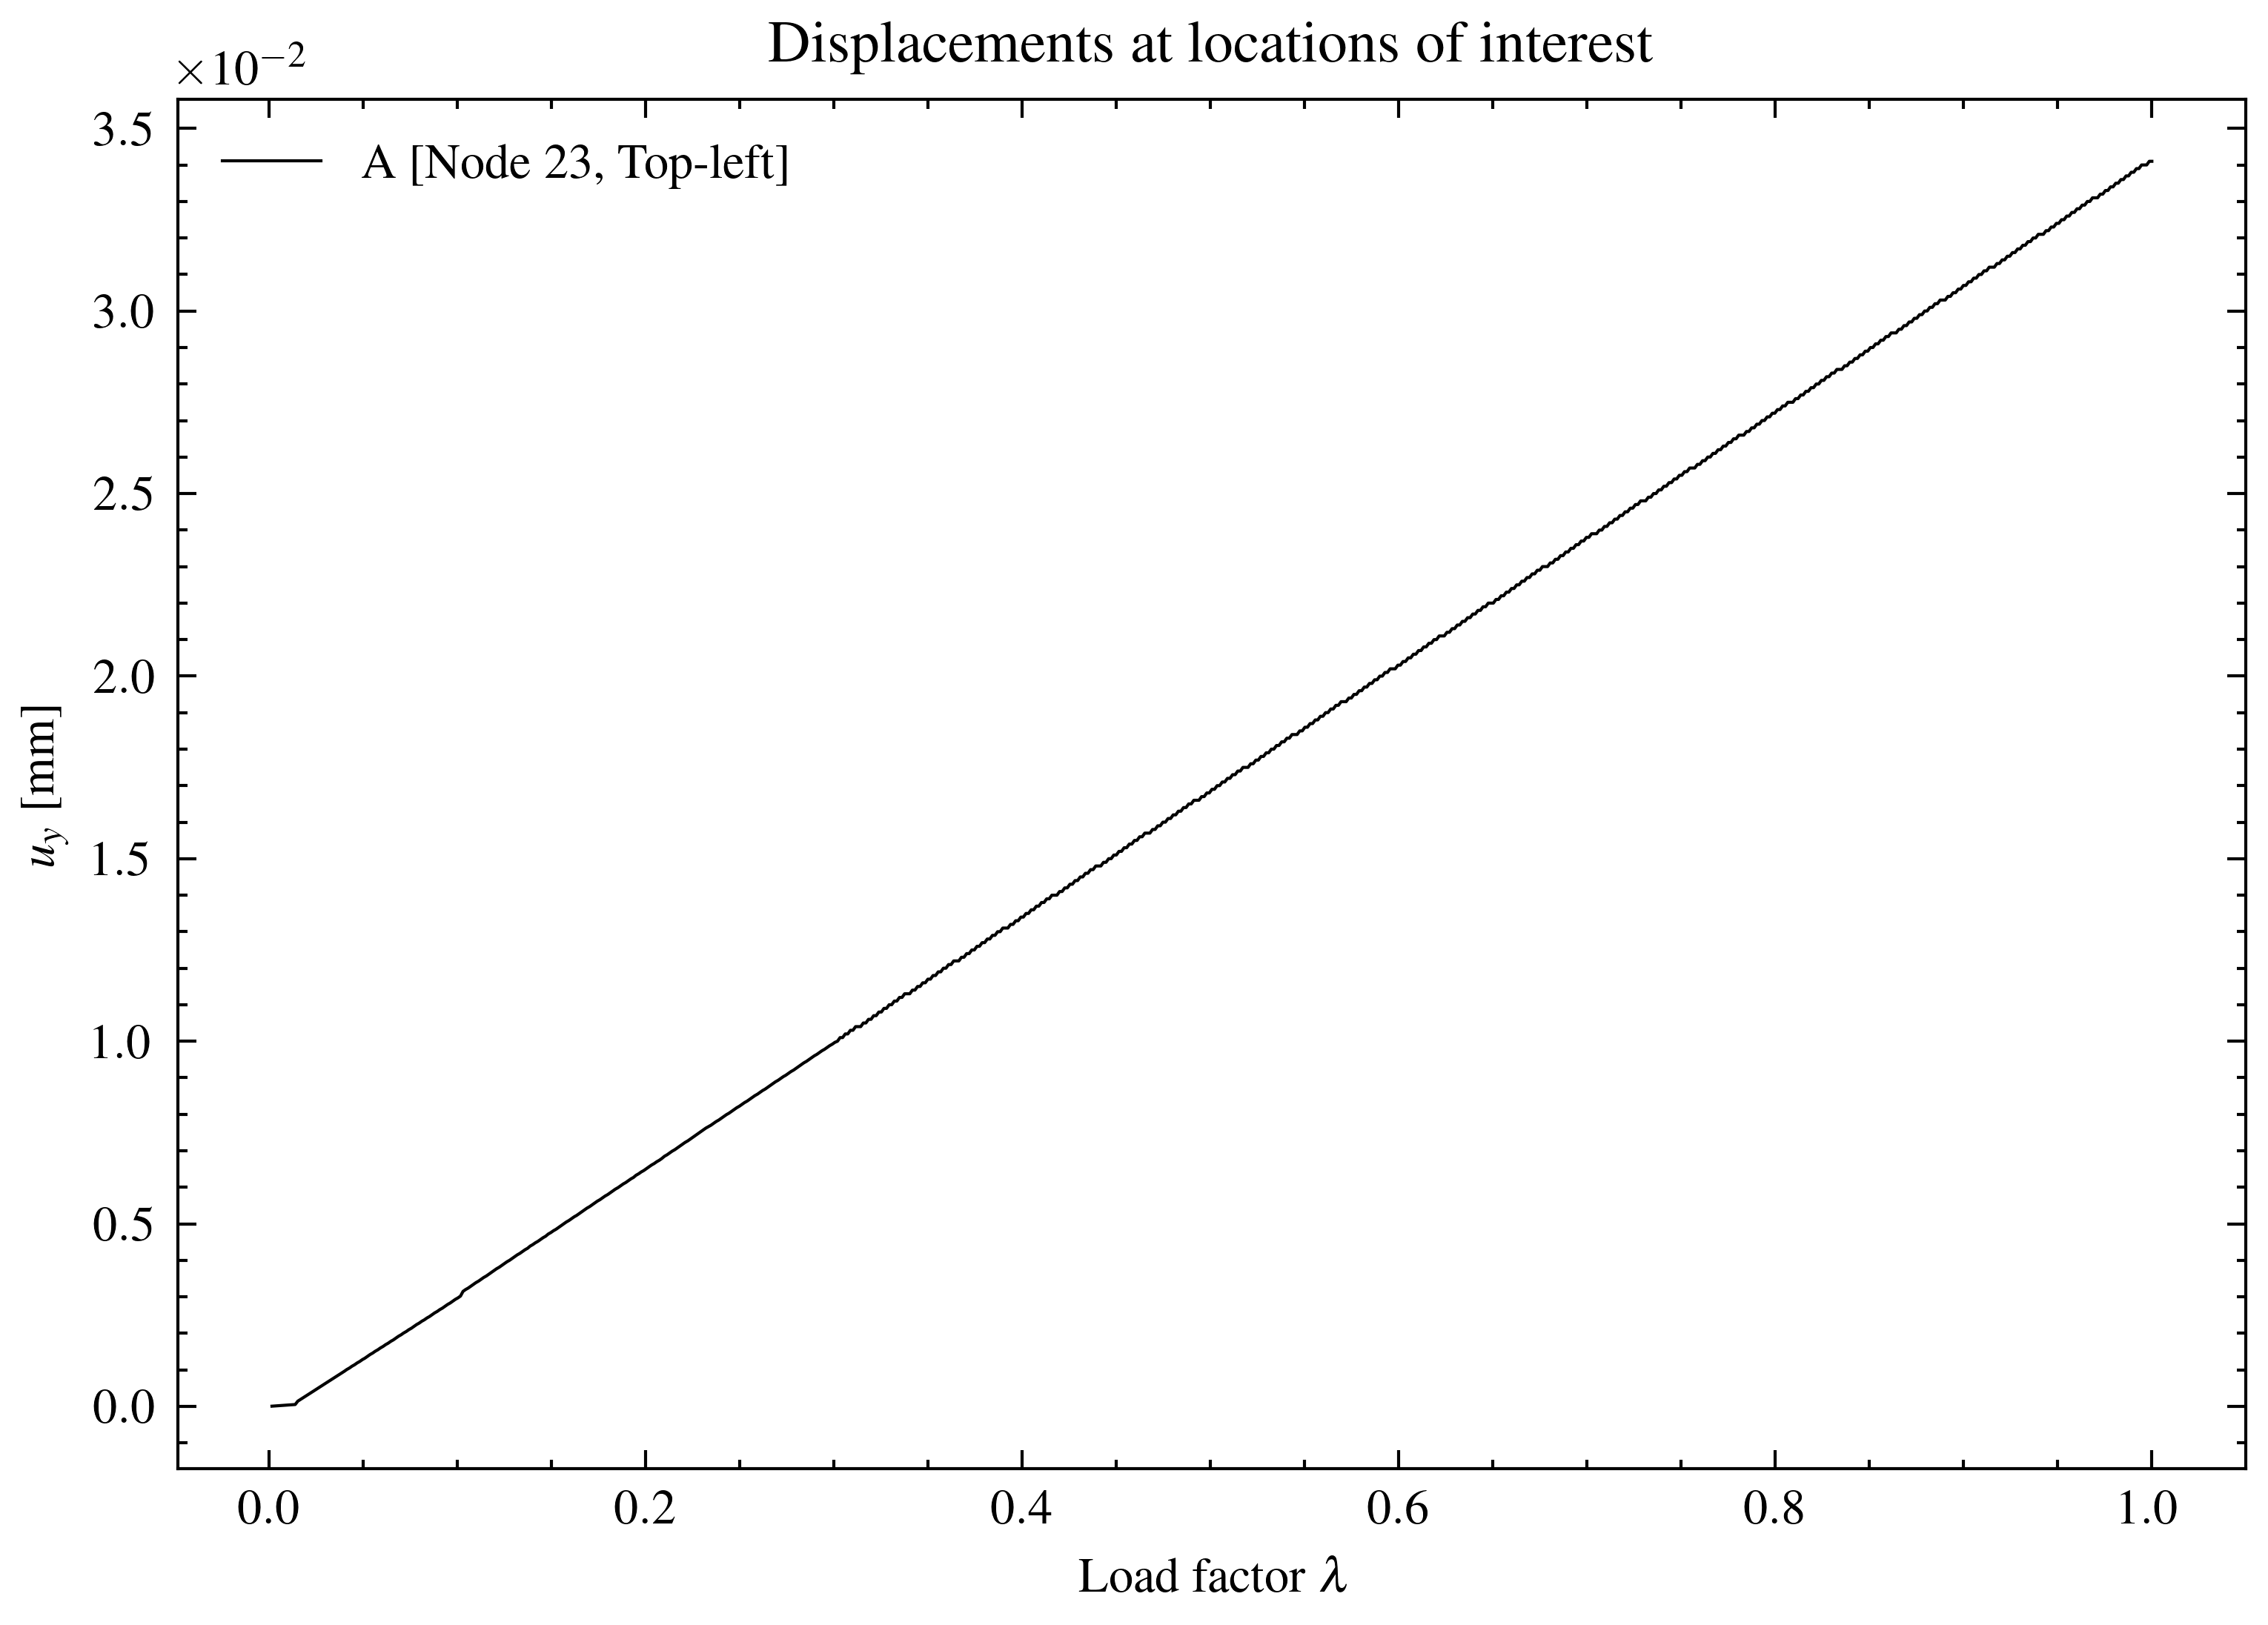

In [6]:
import pandas as pd
import numpy as np
dir = r'C:\Users\javie\OneDrive - Delft University of Technology\Year 2\Q3 & Q4\CIEM0500 - MS Thesis Project\!content\Experimentation\Modelling\Models\Continuum\2D\Standard\2\Outer\analysis\Data\TDtY_node_23.csv'
df = pd.read_csv(dir)

from bricks.fea.plots import plotAnalysis
df['load factor'][1:] = np.arange(1,len(df['load factor'][1:])+1)
data = df.iloc[1:,-2:].values.astype(float)
data[:,1:] *= -1

words = df.iloc[:,-1].name.split()[1:]
words[0] = words[0].capitalize()  
final = ' '.join(words) 


analysis_info = {'titles': r'Displacements at locations of interest',
                 'labels': [r'Load factor $\lambda$',r'$u_y$ [mm]'],
                 'traces': 'A [' + final +', Top-left]',
                 'scientific': True}
fig = plotAnalysis(data, plot_settings=analysis_info)

In [7]:
def tab_nodes(words,step_n,values):

    if words[:2] == ['Elmnr', 'Nodnr']:
        variables = words[2:]
        length = len(words)
        values = True

    if words[0] == 'Output':
        values = False

    if values:
        record = {'Step': step_n}

        if len(words) == length:
            elmn_n, nodn_n = map(int, words[:2])
            record['Elmnr'] = elmn_n
            record['Nodnr'] = nodn_n

            for i, var in enumerate(variables):
                record[var] = float(words[2 + i])

        elif len(words) == length - 1:
            nodn_n = int(words[0])
            record['Elmnr'] = elmn_n
            record['Nodnr'] = nodn_n

            for i, var in enumerate(variables):
                record[var] = float(words[1 + i])

        data_list.append(record)
        
    return data_list, values

def read_file(filepath):
    with open(filepath, "r") as fileOUT:
        lines = fileOUT.readlines()
    return lines

In [13]:
lines[0].split()[-1]

'1'

In [6]:
data_list = []
variables = []
length = 0

step_n = None
nodes = None
intpnt = None
values = False

lines = read_file(path)

for i,line in enumerate(lines[1:]):
    nodes = None
    intpnt = None
    values = None
    words = line.split()

    # --------------------------------- No words --------------------------------- #
    if not words:
        continue    
    # ------------------------------- Extract Info ------------------------------- #
    if words[:2] == ['Analysis','type']:
        atype = words[-1] 
        if line[i+1].split()[:2] == ['Step', 'nr.']:
            step_n = line[i+1].split()[-1]
        if line[i+2].split()[:2] == ['Load', 'factor']:
            lf = line[i+2].split()[-1]    
        info = {'Analysis type': atype, 'Step nr.': step_n, 'Load factor': lf}
        continue
    
    # ------------------------------ Extract values ------------------------------ #
    if words[:2] == ['Elmnr', 'Nodnr']: #General conditions
        if words[-3] == ['X0','Y0','Z0']:
            variables = words[2:-3]
        else: 
            variables = words[2:]
        length = len(words)
        values = True 
    elif words[0] = 'Nodnr':
        if words[-3] == ['X0','Y0']:
            variables = words[2:-2]
        else: 
            variables = words[2:]
        variables = words[1:]
        length = len(words)
        values = True 

    # ----------------------- Extract analysis when INTPNT ----------------------- #
    if words[-1] == 'INTPNT':
        intpnt = True
        continue    
    
    while values & intpnt:
        if len(words) == length: # If there is values for all variables
            for ii in range(4):
                if ii == 0: #For first integration point
                    elmn_n, nodn_n = map(int, words[:2]) #First Integration point
                    for i, var in enumerate(variables):
                        record[var] = float(words[2 + i])
                else: # For the rest of integration points
                    words = lines[i+ii].split()
                    nodn_n = int(words[0])
                    for i, var in enumerate(variables):
                        record[var] = float(words[1 + i])
        else: #If there is some value missing
            



    # ------------------------ Extract analysis when Nodes ----------------------- #
    if words[:2] == ['Analysis','type'] and lines[i+4].split()[-1] != 'INTPNT':
        nodes = True
        continue
    
    
    if words[0] == 'Output':
        values = False
    if words[1] == 'NODES':
        Nodes = True
        Intpnt = False

    if nodes:    
        data_list_nodes, values = tab_nodes(words,step_n, values) #Processing  

    if words[1] == 'INTPNT':
        Nodes = False
        Intpnt = True
    if intpnt:
        words = re.split(r'\s+', line.strip())
        data_list_intpnt, values = tab_intpnt(words,step_n, values)

In [10]:
lines

[' Output                                                                                                                      Page 1\n',
 '  \n',
 ' Analysis type         NONLIN\n',
 ' Step nr.              1     \n',
 ' Load factor           1.000E-01 \n',
 ' Result                DISPLA TOTAL  TRANSL\n',
 ' Axes                  GLOBAL\n',
 '  \n',
 ' Nodnr       TDtX       TDtY  \n',
 '     1   -1.301E-06 -8.976E-06\n',
 '     2   -9.205E-07 -9.088E-06\n',
 '     3   -1.071E-06  0.000E+00\n',
 '     4   -9.949E-07 -1.165E-06\n',
 '     5   -1.572E-07 -8.325E-07\n',
 '     6   -1.056E-06 -4.631E-06\n',
 '     7   -4.341E-08 -3.743E-06\n',
 '     8   -1.983E-06 -8.305E-07\n',
 '     9   -1.147E-06 -1.166E-06\n',
 '    10   -2.102E-06 -3.726E-06\n',
 '    11   -1.095E-06 -4.635E-06\n',
 '    12   -9.917E-07 -5.788E-06\n',
 '    13   -1.077E-06 -5.056E-06\n',
 '    14   -1.327E-06 -7.458E-06\n',
 '    15   -9.799E-07 -5.736E-06\n',
 '    16   -1.067E-06 -5.039E-06\n',
 '    17   -1.157

In [3]:
str = ' Elmnr Intpt        E1         E2         E3        Ecw1       Ecw2       Ecw3        S1         S2         S3   '
len(str)

113